### Tokenize 

In [ ]:
import re

def tokenize(text):
    # Lowercase and tokenize by words
    words = re.findall(r'\b\w+\b', text.lower())
    return words

corpus = "This is an example sentence for the spell checking. This example helps build a bigram model. Models of this kind are useful for spell checking in a text."
words = tokenize(corpus)
vocabulary = set(words)
print(f"Words : {words}")
print(f"Vocabulary : {vocabulary}")


Words : ['this', 'is', 'an', 'example', 'sentence', 'for', 'the', 'spell', 'checking', 'this', 'example', 'helps', 'build', 'a', 'bigram', 'model', 'models', 'of', 'this', 'kind', 'are', 'useful', 'for', 'spell', 'checking', 'in', 'a', 'text']
Vocabulary : {'text', 'helps', 'build', 'checking', 'sentence', 'useful', 'a', 'in', 'of', 'an', 'is', 'spell', 'for', 'models', 'kind', 'the', 'bigram', 'example', 'this', 'are', 'model'}


### Bigram Table

Bigram Table : defaultdict(<class 'collections.Counter'>, {})
Bigram Table : defaultdict(<class 'collections.Counter'>, {'this': Counter({'is': 1, 'example': 1, 'kind': 1}), 'is': Counter({'an': 1}), 'an': Counter({'example': 1}), 'example': Counter({'sentence': 1, 'helps': 1}), 'sentence': Counter({'for': 1}), 'for': Counter({'the': 1, 'spell': 1}), 'the': Counter({'spell': 1}), 'spell': Counter({'checking': 2}), 'checking': Counter({'this': 1, 'in': 1}), 'helps': Counter({'build': 1}), 'build': Counter({'a': 1}), 'a': Counter({'bigram': 1, 'text': 1}), 'bigram': Counter({'model': 1}), 'model': Counter({'models': 1}), 'models': Counter({'of': 1}), 'of': Counter({'this': 1}), 'kind': Counter({'are': 1}), 'are': Counter({'useful': 1}), 'useful': Counter({'for': 1}), 'in': Counter({'a': 1})})


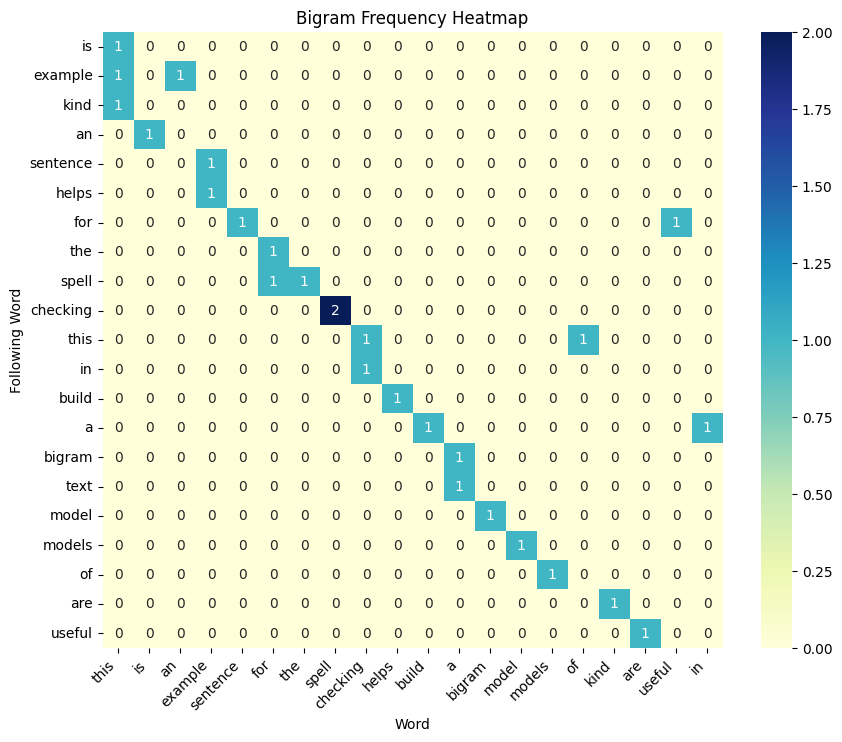

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter, defaultdict


# Build the bigram frequency table as a DataFrame
def bigram_to_dataframe(bigram_table):
    bigram_df = pd.DataFrame(bigram_table).fillna(0)  # Fill NaN values with 0
    return bigram_df
def build_bigram_table(words):
    bigram_table = defaultdict(Counter)
    for i in range(len(words) - 1):
        bigram_table[words[i]][words[i+1]] += 1
    return bigram_table

bigram_table = build_bigram_table(words)
print(f"Bigram Table : {bigram_table}")
bigram_df = bigram_to_dataframe(bigram_table)

# Plot the bigram frequency heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(bigram_df, annot=True, fmt=".0f", cmap="YlGnBu", cbar=True)
plt.title("Bigram Frequency Heatmap")
plt.xlabel("Word")
plt.ylabel("Following Word")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


### Non word Spelling Errors

In [ ]:
def identify_errors(input_text, vocabulary):
    input_words = tokenize(input_text)
    errors = [word for word in input_words if word not in vocabulary]
    return errors

input_text = "This is an exmple of the text for spell cheking."
errors = identify_errors(input_text, vocabulary)
errors

['exmple', 'cheking']

### Suggest the Best Candidate Using Bigram Probability

In [18]:
def edits1(word):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]
    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def generate_candidates(word, vocabulary):
    return {w for w in edits1(word) if w in vocabulary}

candidates = {error: generate_candidates(error, vocabulary) for error in errors}
candidates

{'exmple': {'example'}, 'cheking': {'checking'}}